<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Digital-Image-Processing/blob/main/Mathematical_Morphology_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt
import imageio

In [2]:
s=np.zeros((7,7))
s[3,1:6]=1
s[1:6,2:5]=1

In [3]:
s

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [4]:
w=morphology.dilation(s,morphology.diamond(1))

In [5]:
w

array([[0., 0., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 0., 0.]])

In [6]:
!wget https://raw.githubusercontent.com/maponti/imageprocessing_course_icmc/master/images/hit2.png

--2021-10-06 16:04:44--  https://raw.githubusercontent.com/maponti/imageprocessing_course_icmc/master/images/hit2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4656 (4.5K) [image/png]
Saving to: ‘hit2.png’

hit2.png            100%[===================>]   4.55K  --.-KB/s    in 0s      

2021-10-06 16:04:45 (52.7 MB/s) - ‘hit2.png’ saved [4656/4656]



In [7]:
a=imageio.imread("/content/hit2.png")

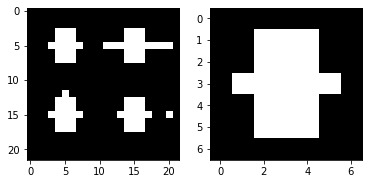

In [8]:
plt.subplot(121)
plt.imshow(a,cmap="gray")
plt.subplot(122)
plt.imshow(s,cmap="gray")

In [9]:
erosion_a=morphology.erosion(a,s).astype(np.uint8)

Text(0.5, 1.0, 'A erosion s')

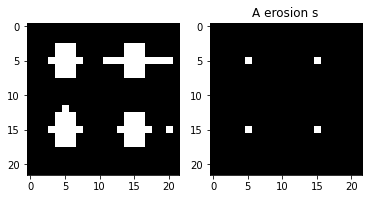

In [10]:
plt.subplot(121)
plt.imshow(a,cmap="gray")
plt.subplot(122)
plt.imshow(erosion_a,cmap="gray")
plt.title("A erosion s")

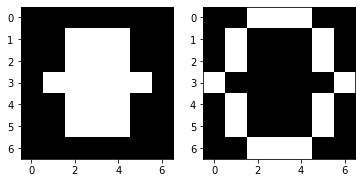

In [11]:
wminuss=w-s
plt.subplot(121)
plt.imshow(s,cmap="gray")
plt.subplot(122)
plt.imshow(w-s,cmap="gray")

Text(0.5, 1.0, 'A complement')

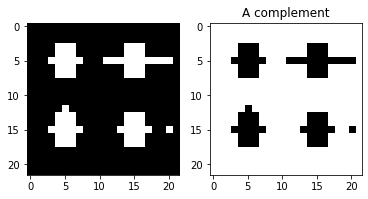

In [13]:
acomp=(a-1).astype(np.uint8)
plt.subplot(121)
plt.imshow(a,cmap="gray")
plt.subplot(122)
plt.imshow(acomp,cmap="gray")
plt.title("A complement")

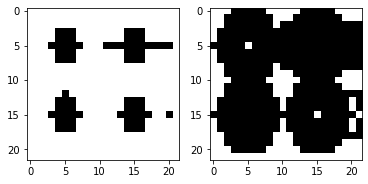

In [14]:
acomp_w_minus_s=morphology.erosion(acomp,wminuss).astype(np.uint8)
plt.subplot(121)
plt.imshow(acomp,cmap="gray")
plt.subplot(122)
plt.imshow(acomp_w_minus_s,cmap="gray")

Text(0.5, 1.0, 'hit_or_miss')

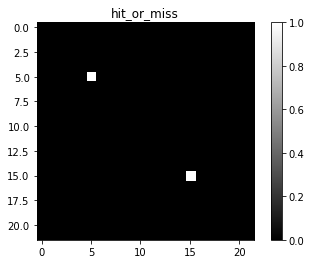

In [17]:
a_hit_s=np.bitwise_and(acomp_w_minus_s==255,erosion_a==255).astype(np.uint8)
plt.imshow(a_hit_s,cmap="gray")
plt.colorbar()
plt.title("hit_or_miss")